In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
import pickle #me permite guardar objetos de python
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
#import lightgbm as lgb
#from catboost import CatBoostClassifier librerias que toman datos numericos y categoricos. 
from sklearn.ensemble import RandomForestClassifier


### Observaciones:

Importamos nuestros datos de EDA previo, para comenzar el análisis del ejercicio aplicando el modelo árbol de decisión.

In [57]:
df =  pd.read_csv('/workspaces/Antonio27M-machine-learning/data/processed/eda_insulina.csv')

In [58]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [59]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [60]:
y_train.head()

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

In [61]:
model = DecisionTreeClassifier(random_state=18)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,18
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [62]:
model.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=18)>

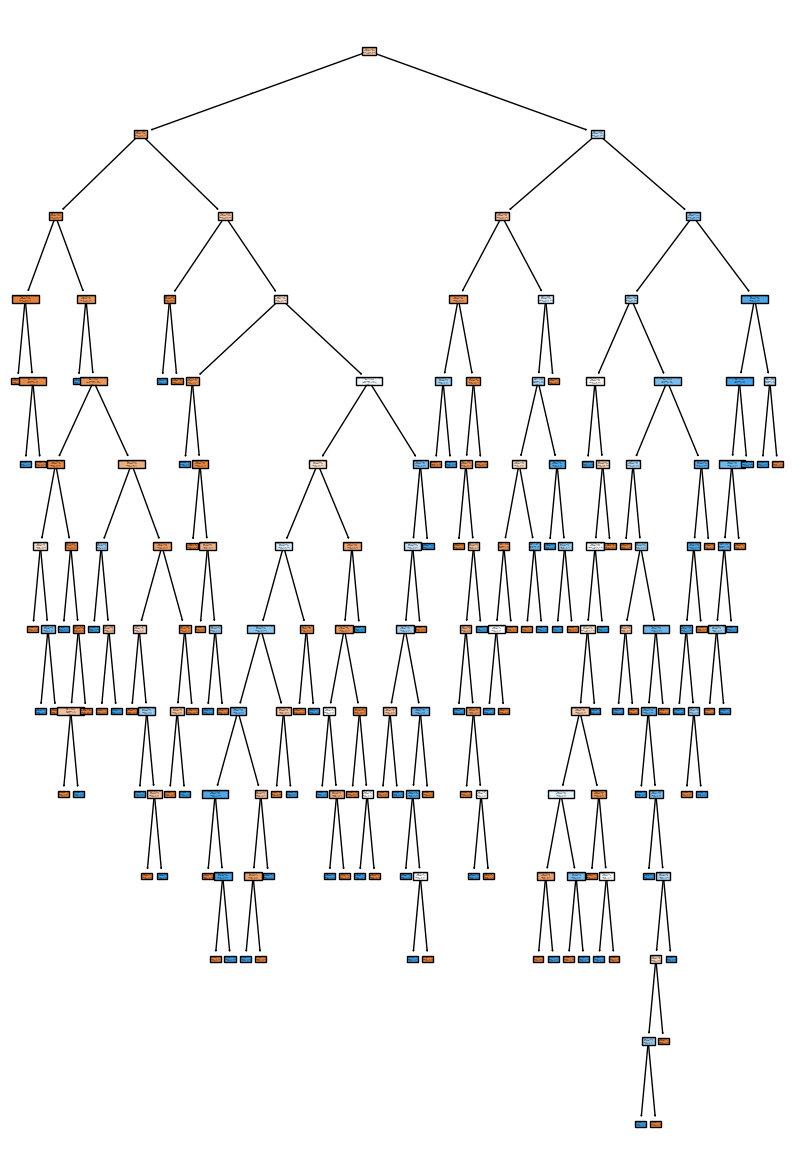

In [63]:
fig = plt.figure(figsize=(10,15))
tree.plot_tree(model, feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)
plt.show()

### Observaciones:

Se realiza un gráfico para observar los diferentes niveles dentro de nuestro modelo, visualizando más de 12 niveles. 

In [64]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [65]:
accuracy_score(y_test, y_pred)

0.7727272727272727

### Observaciones: 

Resultado original sin alteraciones en los parámetros con un porcentaje 77%.

In [66]:
model_uno = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=120, random_state=18, class_weight="balanced")
model_uno.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'random'
,max_depth,120
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,18
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [67]:
y_pred = model_uno.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [68]:
accuracy_score(y_test, y_pred)

0.7207792207792207

### Observaciones: 

Resultado segundario realizando hiperparametrización con diferentes resultados, tomando el resultado más elevado con un porcentaje 72%. (Manual)

In [69]:
model_arbol = RandomForestClassifier(random_state = 18)
model_arbol.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


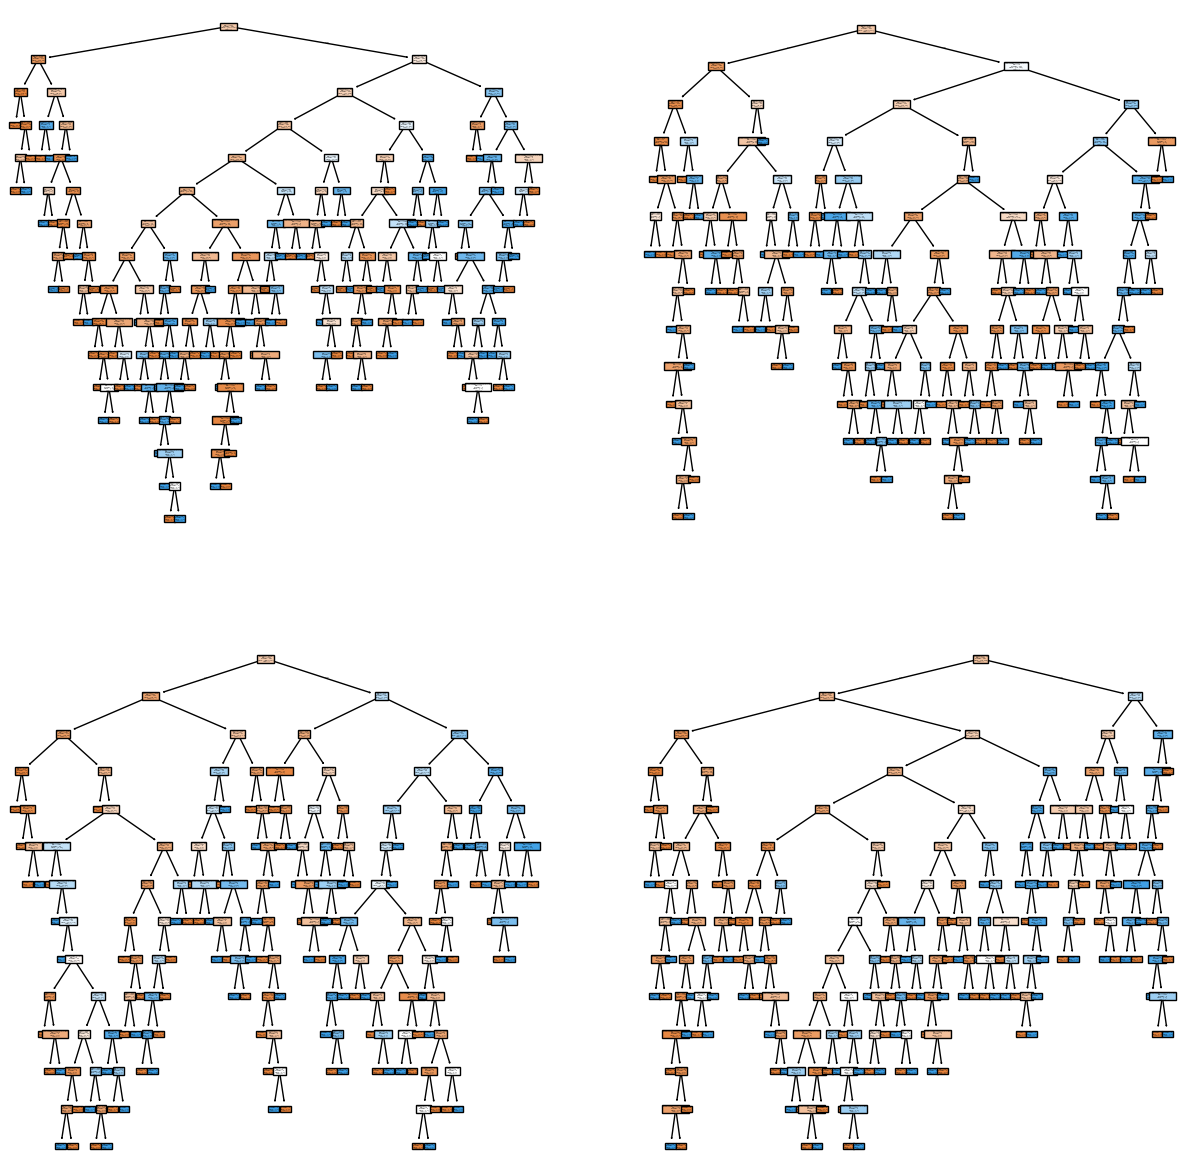

In [70]:
fig, axis = plt.subplots(2, 2, figsize=(15, 15))
tree.plot_tree(model_arbol.estimators_[0], ax=axis[0, 0], feature_names=list(X_train.columns), class_names=["0", "1", "2"], filled=True)
tree.plot_tree(model_arbol.estimators_[1], ax=axis[0, 1], feature_names=list(X_train.columns), class_names=["0", "1", "2"], filled=True)
tree.plot_tree(model_arbol.estimators_[2], ax=axis[1, 0], feature_names=list(X_train.columns), class_names=["0", "1", "2"], filled=True)
tree.plot_tree(model_arbol.estimators_[3], ax=axis[1, 1], feature_names=list(X_train.columns), class_names=["0", "1", "2"], filled=True)
plt.show()

In [71]:
y_pred_test = model_arbol.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [73]:
accuracy_score(y_test, y_pred)

0.7207792207792207

In [113]:
param_grid = {'n_estimators':[20, 50, 100],'max_depth': [3, 5, 10],'criterion':['gini', 'entropy'],'max_features': ['sqrt', 'log2', None],
                   'min_samples_split': [10, 20, 50], 'min_samples_leaf': [1, 2, 4]}

In [114]:
grid_search_arbol = GridSearchCV(RandomForestClassifier(random_state=18),
                                param_grid,
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1,
                                verbose=1)

grid_search_arbol.fit(X_train, y_train)

grid_search_arbol.best_params_

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [115]:
grid_search_arbol.best_estimator_.fit(X_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [116]:
y_pred_test_grid = grid_search_arbol.best_estimator_.predict(X_test)
y_pred_test_grid

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [118]:
accuracy_score(y_test, y_pred_test_grid)

0.7597402597402597

### Observaciones: 

Resultado segundario realizando hiperparametrización con diferentes resultados, tomando el resultado más elevado con un porcentaje 76%. 

In [120]:
with open('/workspaces/Antonio27M-machine-learning/models/modelo-random.pkl', 'wb') as file:
    pickle.dump(model_arbol, file)